In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [10]:
#loading data
df = pd.read_excel("heart_disease.xlsx")
df

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [11]:
#some information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes
None
        age                                       Age in years
0    Gender                       Gender ; Male - 1, Female -0
1        cp                                    Chest pain type
2  trestbps                             Resting blood pressure
3      chol                                cholesterol measure
4       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [12]:
#checking for any missing values
print(df.isnull().sum())

age             0
Age in years    0
dtype: int64


In [16]:
#for categorical data
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

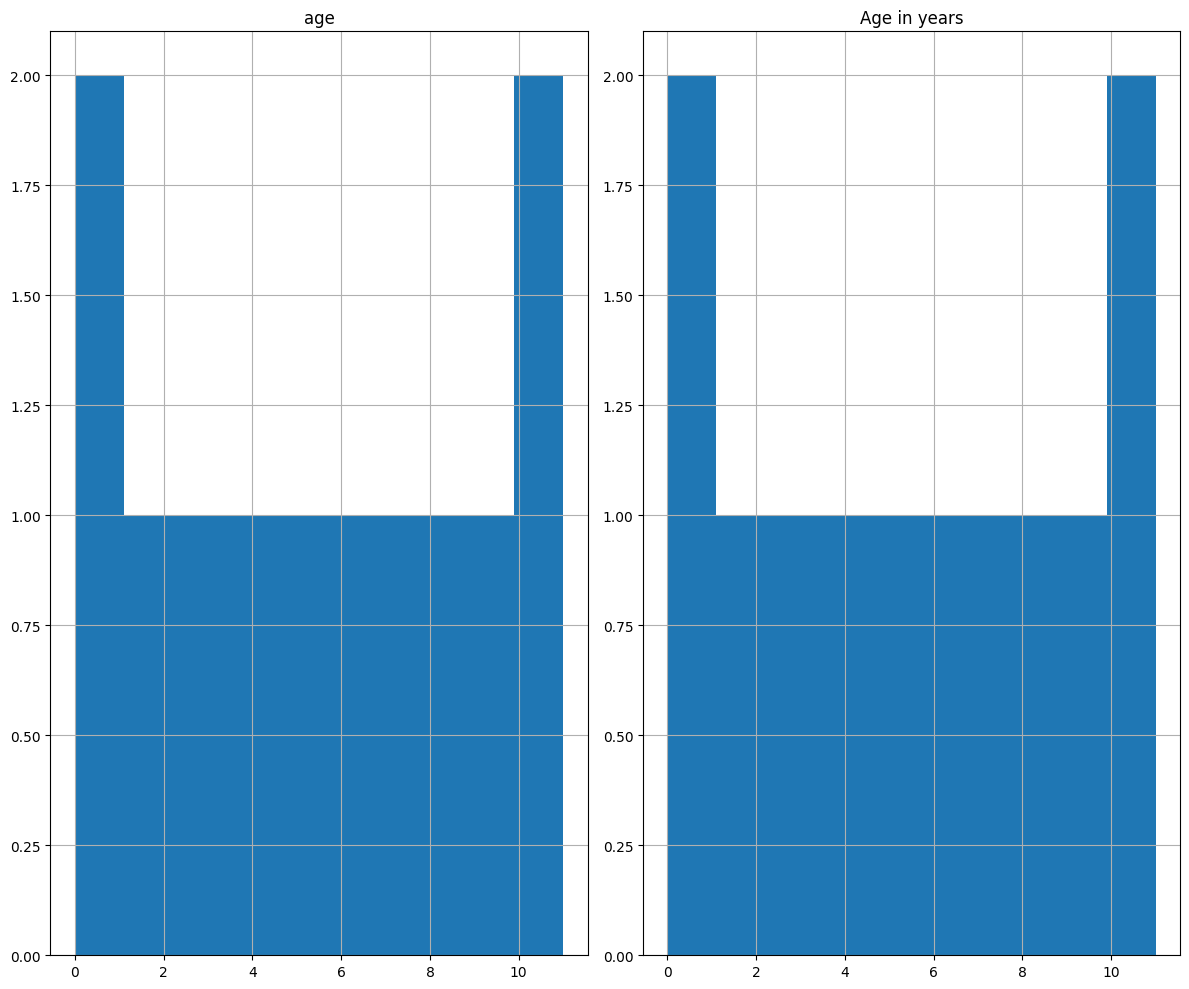

In [22]:
#hist plot
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

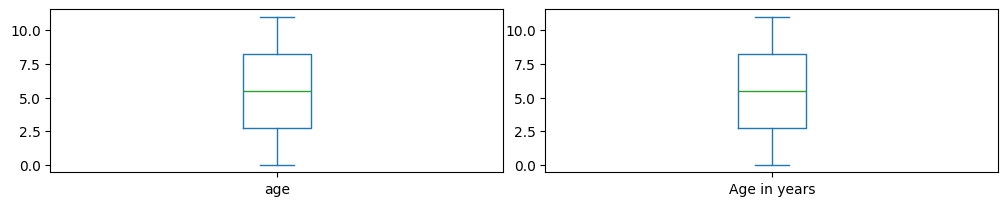

In [21]:
#box plot
df.plot(kind='box', subplots=True, layout=(5, 3), figsize=(15, 10))
plt.tight_layout()
plt.show()

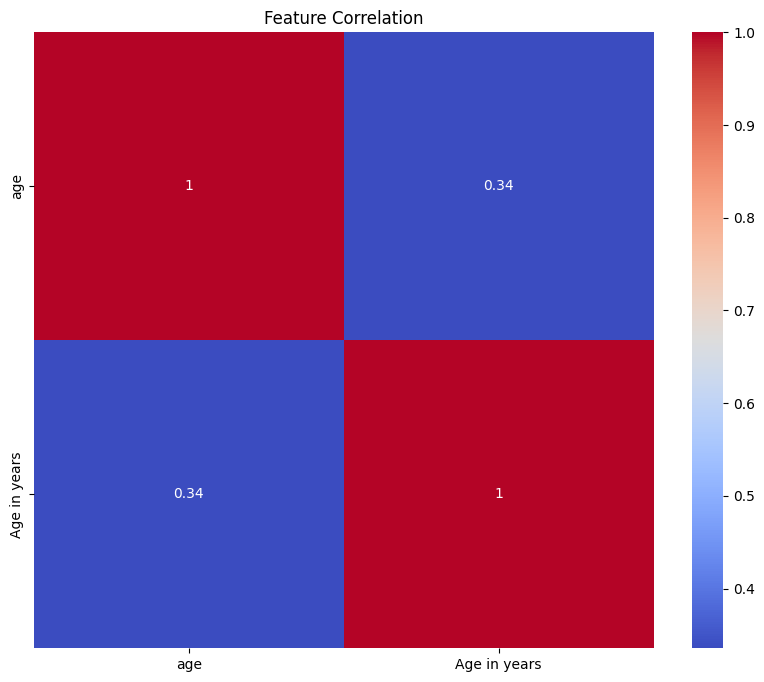

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [ ]:
#no feature engineeering required.

In [28]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [30]:
X = df.drop('target', axis=1)
y = df['target']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#taining model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


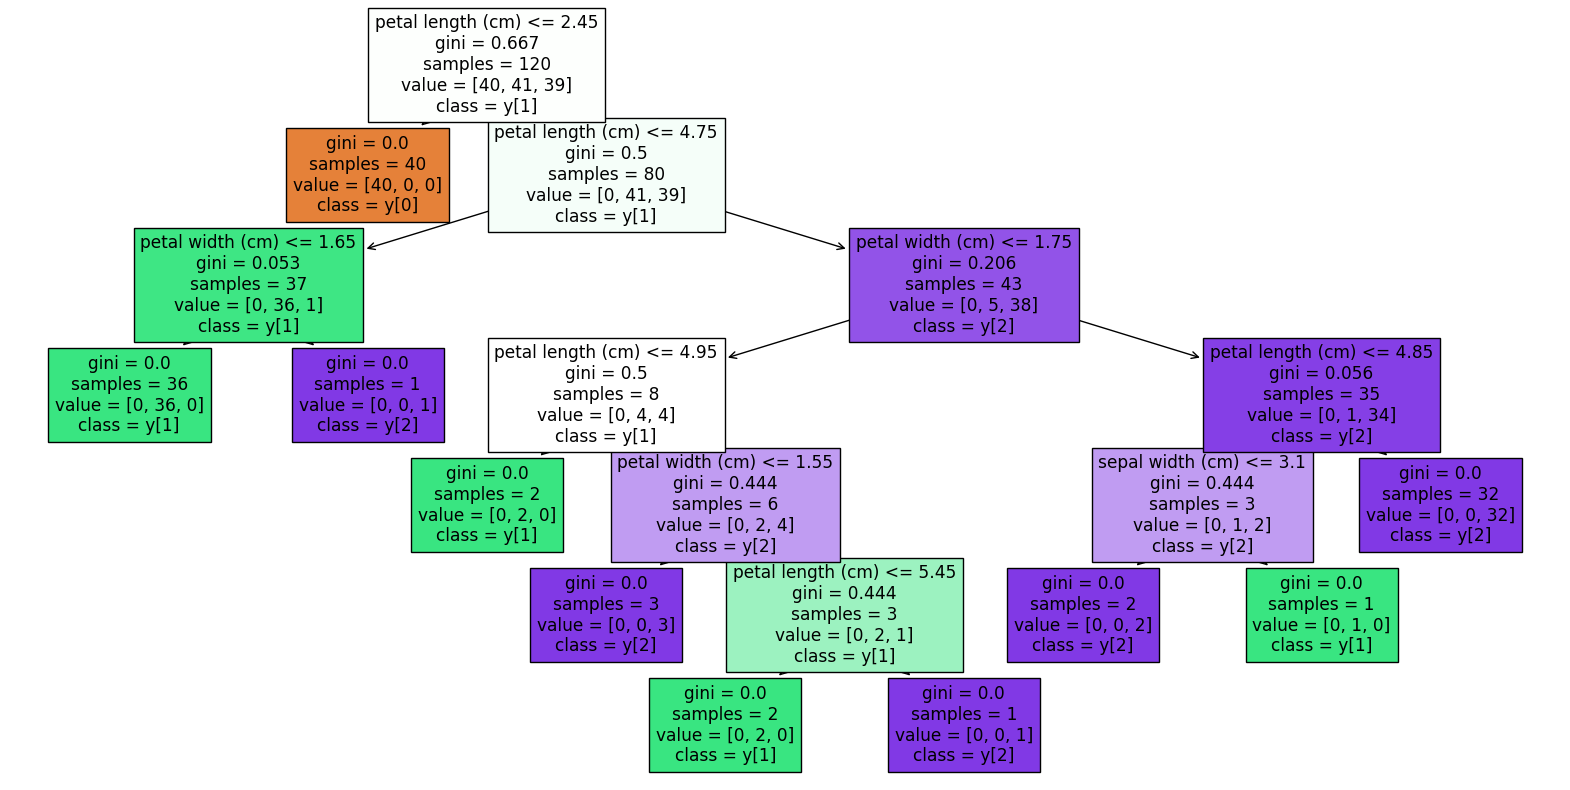

In [35]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=True, filled=True)
plt.show()

In [ ]:
# What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
max_depth - this limits how deep the tree can goes.And Prevents from overfitting.
min_samples_split:this need Minimum samples to split a node.  if Higher it gives a simple tree.
min_samples_leaf: this need Minimum samples in a leaf. And helps to avoid tiny leaves.
max_features: this Limits the number of features used to split the dataset. And Adds the randomness.
criterion:This Decides how to split the dataset based on ('gini' or 'entropy').


In [ ]:
# What is the difference between the Label encoding and One-hot encoding?
 Label Encoding: converts categories into numbers 
preferable for ordered data
One-Hot Encoding: converts categories into separate columns with 0s and 1s.
preferable for unordered data